# Predicting Diabetes
This notebook implements the process to build a Machine Learning model, based on the PIMI Indian Diabetes dataset, that intends to predict diabetes.
The approach is base on this github repo from Jerry Kurata:
* Kurata's repo: [bit.ly/ml_python](http://bit.ly/ml_python)
* Alternative source and columns definition: https://data.world/data-society/pima-indians-diabetes-database

#### Columns
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## 2. Load, review and clean the dataset

In [2]:
df = pd.read_csv('./data/pima-data.csv')

In [3]:
# check database shape and structure
df.shape

(768, 10)

In [4]:
# overview of the data display
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
# check if there is any null value
df.isnull().values.any()

False

In [6]:
# check if there is any NA value
df.isna().values.any()

False

In [7]:
# check correlation
def plot_correlation(df, cmap='cool', s=7):
    '''
    Receives a dataframe df and displays a matrix showing the variables correlations.
    Arguments:
         * df   = a pandas dataframe
         * cmap = the colormap to be used (default is "cool") [optional]
         * s    = the size in inches of the figure output (default is 6) [optional]
    '''
    # create correlation dataframe and plot it
    correlations = df.corr()
    fig, ax = plt.subplots(figsize=(s,s))
    ax.matshow(correlations, cmap=cmap)
    
    # add lables to x and y axis
    c = df.columns
    i = range(len(c))
    plt.xticks(i,c, rotation='vertical', fontsize=13)
    plt.yticks(i,c, fontsize=13)
    
    # add contenta annotations to each cell
    if cmap == 'cool': 
        color = 'k' 
    else: 
        color = 'w'
    
    for j in i:
        for k in i:
            text = ax.text(k, j, 
                           round(correlations.iloc[j,k], 2),
                           ha='center',
                           va='center',
                           color=color)
   
    plt.show()


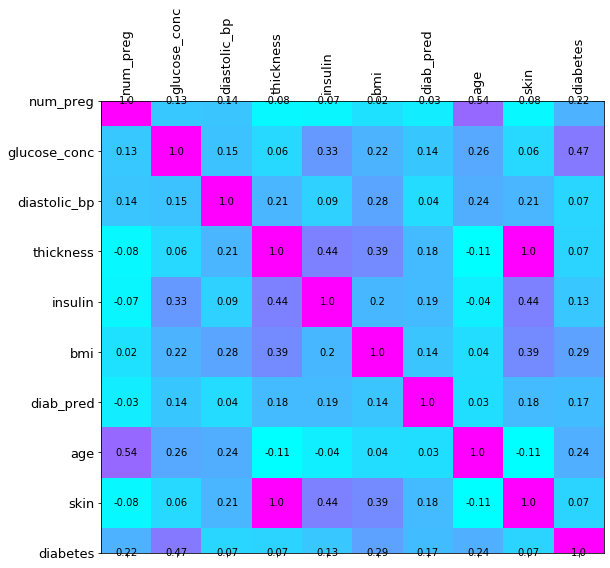

In [8]:
plot_correlation(df, s=9)

The heatmap shows us that there is a strong correlation between skin and thickness features. Let's drop the skin column and check frame again

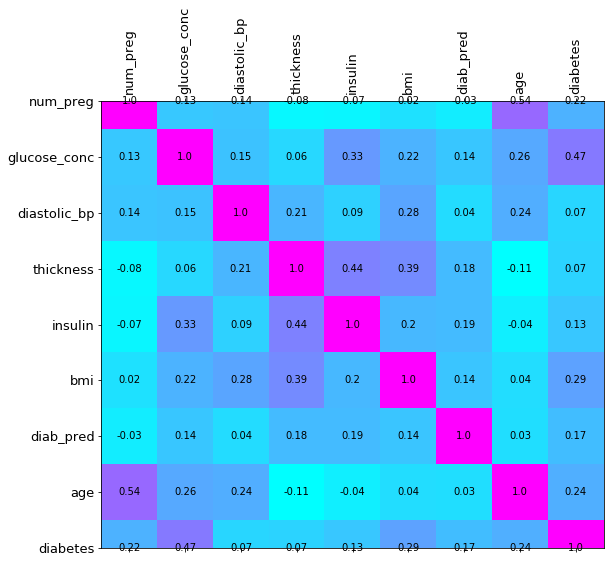

In [9]:
# delete redundant skin column
del(df['skin'])

# plot again the cleaned dataframe
plot_correlation(df, s=9)

---
## 3. Prepare modeling and training

In [10]:
# check dataframe data types
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes           bool
dtype: object

In [11]:
# turn the boolean feature into numerical
bool_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(bool_map) 

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes          int64
dtype: object

In [14]:
# check distribution of cases we want to predict
# rare events do not have enough critical mass to be predicted

cases = df['diabetes'].value_counts() / len(df['diabetes'].values)  * 100
print('False cases : \t{:.2f} %\nTrue cases : \t{:.2f} %'.format(cases[0], cases[1]))

False cases : 	65.10 %
True cases : 	34.90 %


#### Split the dataset intro training and testing

In [15]:
from sklearn.model_selection import train_test_split

x         = df.iloc[:, :-1] # features columns 
y         = df.iloc[:, -1:] # target columnd to be predicted
test_size = 0.3

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=test_size,
                                                    random_state=42)

In [17]:
# validate split size
print('training size \t = {:.2f}'.format(len(x_train)/len(df.index)))
print('testing size \t = {:.2f}'.format(len(x_test)/len(df.index)))

training size 	 = 0.70
testing size 	 = 0.30


In [18]:
aux = df.diabetes.value_counts() / len(df) * 100
print('Original diabetes ratio:\nFalse\t: {:.2f} %\nTrue\t: {:.2f} %'.format(aux[0], aux[1]))

Original diabetes ratio:
False	: 65.10 %
True	: 34.90 %


In [19]:
aux = y_train.diabetes.value_counts() / len(y_train) * 100
print('Training diabetes ratio:\nFalse\t: {:.2f} %\nTrue\t: {:.2f} %'.format(aux[0], aux[1]))

Training diabetes ratio:
False	: 64.99 %
True	: 35.01 %


In [20]:
aux = y_test.diabetes.value_counts() / len(y_test) * 100
print('Test diabetes ratio:\nFalse\t: {:.2f} %\nTrue\t: {:.2f} %'.format(aux[0], aux[1]))

Test diabetes ratio:
False	: 65.37 %
True	: 34.63 %


In [21]:
# check for weird values that could be hidden and are not null
df.head()
# for example, it is not feasible that a thickness = 0 is possible to occur

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# lets check for the amount of zero values in all columns
cols = df.columns[1:-1] # remove number of pregnacies and diabetes columns
print('total rows = {}'.format(len(df)))
for c in cols:
    zeros = df[df[c] == 0]
    print('column {} = {}'.format(c, len(zeros[c])))
print('\nIn what columns is acceptable to have zero values?')

total rows = 768
column glucose_conc = 5
column diastolic_bp = 35
column thickness = 227
column insulin = 374
column bmi = 11
column diab_pred = 0
column age = 0

In what columns is acceptable to have zero values?


#### Since we do not have domain expertise on the subject, we'll replace these zero values with the means of each column

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
fill_0 = SimpleImputer(missing_values=0, strategy='mean', copy=True)

x_train = fill_0.fit_transform(x_train)
x_test  = fill_0.fit_transform(x_test) 

In [25]:
print(x_train)

[[  1.          95.          60.         ...  23.9          0.26
   22.        ]
 [  5.         105.          72.         ...  36.9          0.159
   28.        ]
 [  4.34056399 135.          68.         ...  42.3          0.365
   24.        ]
 ...
 [ 10.         101.          86.         ...  45.6          1.136
   38.        ]
 [  4.34056399 141.          72.24131274 ...  42.4          0.205
   29.        ]
 [  4.34056399 125.          96.         ...  22.5          0.262
   21.        ]]


---
## 4. Start training
### Using Naive Bayes model

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.diabetes.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

---
## 5. Evaluate model accuracy

In [28]:
from sklearn import metrics
nb_predict_train = nb_model.predict(x_train)
print('Accuracy against TRAINING dataset = {:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))

nb_predict_test = nb_model.predict(x_test)
print('Accuracy against TEST dataset = {:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy against TRAINING dataset = 0.7542
Accuracy against TEST dataset = 0.7359


#### Confusion Matrix

In [34]:
print(metrics.confusion_matrix(y_test, nb_predict_test))

[[118  33]
 [ 28  52]]


#### Classification Report

In [35]:
print(metrics.classification_report(y_test, nb_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

